In [ ]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 18: Least Squares

In [ ]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

### Discussion Question ###

Midterm: Average 70, SD 10
Final:   Average 50, SD 12
r = 0.75

a) Estimate the average final exam score for those who got 90 on the midterm.

b) Estimate the average final exam score for those who got 60 on the midterm.

### Regression Line ###

In [ ]:
def standard_units(w):
    return (w - np.average(w))/np.std(w)  

# t is a table; x and y are column labels

def correlation(t, x, y):
    return np.average(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(t, x, y):
    r = correlation(t, x, y)
    return r * np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.average(t.column(y)) - a * np.average(t.column(x))

In [ ]:
def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [68]:
little_women = Table.read_table('little_women.csv')
little_women = little_women.move_to_start('Periods')
little_women

Periods,Characters
189,21759
188,22148
231,20558
195,25526
255,23395
140,14622
131,14431
214,22476
337,33767
185,18508


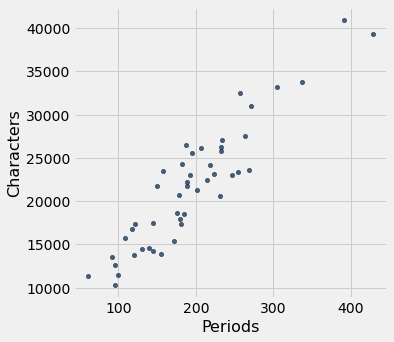

In [69]:
little_women.scatter('Periods', 'Characters')

In [70]:
correlation(little_women, 'Periods', 'Characters')

0.9229576895854816

In [71]:
sl = slope(little_women, 'Periods', 'Characters')
sl

86.97784125829821

In [72]:
inter = intercept(little_women, 'Periods', 'Characters')
inter

4744.784796574928

In [74]:
180*sl+inter

20400.796223068606

In [75]:
predicted = fitted_values(little_women, 'Periods', 'Characters')

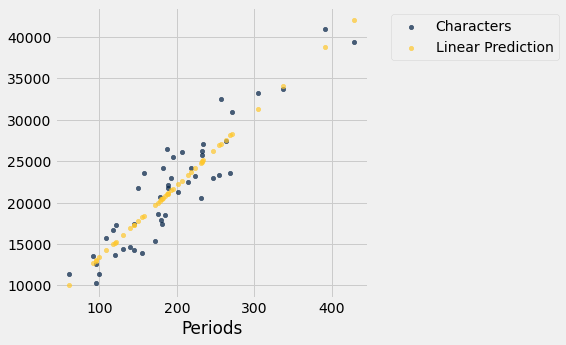

In [76]:
lw_with_predictions = little_women.with_column('Linear Prediction', predicted)
lw_with_predictions.scatter('Periods')

In [77]:
lw_with_predictions

Periods,Characters,Linear Prediction
189,21759,21183.6
188,22148,21096.6
231,20558,24836.7
195,25526,21705.5
255,23395,26924.1
140,14622,16921.7
131,14431,16138.9
214,22476,23358
337,33767,34056.3
185,18508,20835.7


In [79]:
actual = little_women.column('Characters')
errors = actual - predicted

In [80]:
lw_with_predictions.with_column('Error', errors)

Periods,Characters,Linear Prediction,Error
189,21759,21183.6,575.403
188,22148,21096.6,1051.38
231,20558,24836.7,-4278.67
195,25526,21705.5,3820.54
255,23395,26924.1,-3529.13
140,14622,16921.7,-2299.68
131,14431,16138.9,-1707.88
214,22476,23358,-882.043
337,33767,34056.3,-289.317
185,18508,20835.7,-2327.69


In [81]:
np.mean(errors ** 2) ** 0.5

2701.690785311856

In [82]:
lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')

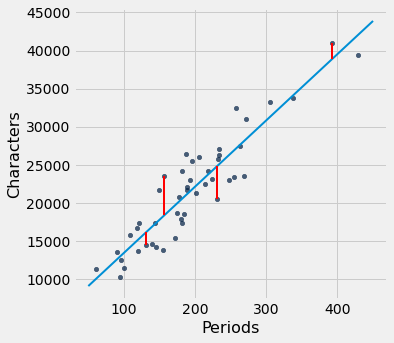

In [83]:
lw_errors(lw_reg_slope, lw_reg_intercept)

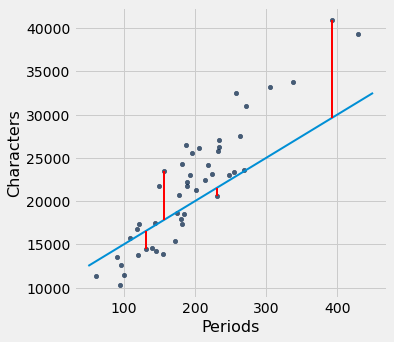

In [84]:
# takes any slope, any intercept

lw_errors(50, 10000)

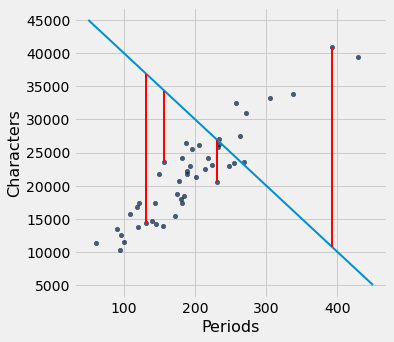

In [85]:
lw_errors(-100, 50000)

### Root Mean Square Error ###

In [86]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Root mean squared error: 4322.167831766537


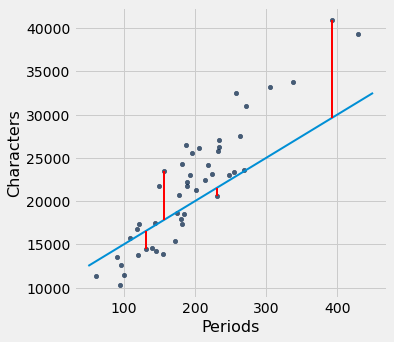

In [87]:
lw_rmse(50, 10000)

Root mean squared error: 16710.11983735375


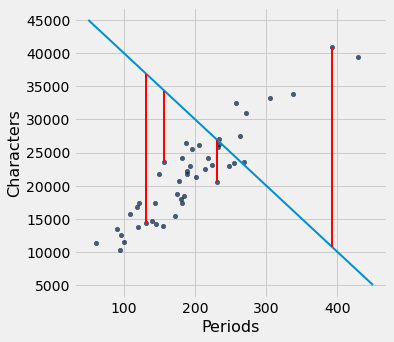

In [88]:
lw_rmse(-100, 50000)

Root mean squared error: 2715.5391063834586


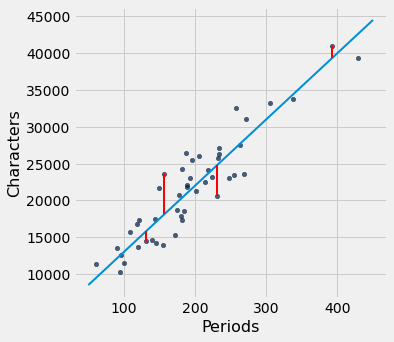

In [89]:
lw_rmse(90, 4000)

Root mean squared error: 2701.690785311856


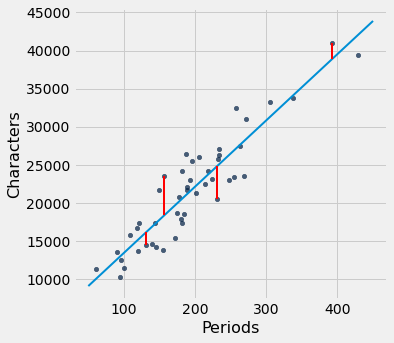

In [90]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

### Numerical Optimization ###

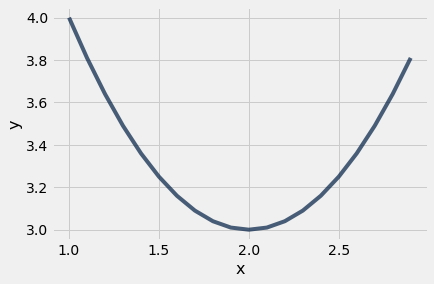

In [91]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x,
                   'y', y).plot('x')

In [92]:
def f(x):
    return ((x-2)**2) + 3

In [93]:
minimize(f)

1.9999999946252267

In [ ]:
minimize?

### Minimizing RMSE ###

In [94]:
def lw_rmse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [95]:
lw_rmse(50, 10000)

4322.167831766537

In [96]:
lw_rmse(-100, 50000)

16710.11983735375

In [97]:
minimize(lw_rmse)

array([  86.97784126, 4744.78481477])

In [98]:
lw_reg_slope, lw_reg_intercept

(86.97784125829821, 4744.784796574928)

### Nonlinear Regression ###

In [ ]:
shotput = Table.read_table('shotput.csv')

In [ ]:
shotput

In [ ]:
shotput.scatter('Weight Lifted')

In [ ]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

In [ ]:
best_line = minimize(shotput_linear_rmse)
best_line

In [ ]:
weights = shotput.column(0)

In [ ]:
linear_fit = best_line.item(0)*weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

**Quadratic Function**

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.



In [ ]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

In [ ]:
best_quad = minimize(shotput_quadratic_rmse)
best_quad

In [ ]:
# x = weight lifted = 100 kg
# Then predicted shot put distance:

(-0.00104)*(100**2) + 0.2827*100 - 1.5318

In [ ]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)

In [ ]:
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)